# 1.0 **Project Title: Risk Assessment for the Operations Of Private and Commercial Aircrafts**

### ***Author:*** Patrice Okoiti

## 🔍 **1.0 Business Understanding**
---

In the aviation industry, safety and operational efficiency are paramount. Airplane accidents can result in tragic loss of life, financial damages, and reputational harm to airlines and regulatory bodies. As the aviation sector becomes more data-rich, there is an opportunity to harness historical accident data to identify patterns and factors contributing to fatal incidents. This project aims to analyze aviation accident data to generate actionable insights and build a recommendation system that helps stakeholders, such as Umoja Logistics, to mitigate risk and improve flight safety. By leveraging data-driven recommendations, organizations can make informed decisions on aircraft procurement, flight routing, and maintenance scheduling.


### ⚠️ **1.1 Challenges** 

Key challenges include:
- Identifying the aircraft models and categories most associated with fatal accidents.
- Understanding the influence of weather, flight purpose, and location on accident severity.
- Dealing with missing or inconsistent data in historical records.
- Ensuring interpretability of insights to support actionable decision-making.
- Differentiating between causal factors and correlated patterns.


### 💡 **1.2 Proposed Solution**

Conduct a comprehensive analysis of aviation accident records to:
- Explore accident frequency and injury severity across aircraft categories and flight purposes.
- Evaluate temporal and geographic trends in accidents.
- Engineer risk-related features such as severity scores and fatality flags.
- Visualize the correlation between weather conditions and fatal outcomes.
- Provide a data-driven recommendation system that highlights safer aircraft choices, high-risk regions, and optimal conditions for flight operations.


### ✅ **1.3 Conclusion**

By analyzing aviation accident data, organizations can proactively reduce operational risks, enhance safety protocols, and optimize decision-making. The resulting recommendation system will help stakeholders adopt more informed strategies in aircraft deployment and risk management.


### 📌 **1.4 Problem Statement**

Umoja Logistics seeks to reduce its risk exposure from fatal aviation incidents. The company currently lacks an evidence-based system to guide decisions related to aircraft acquisition, routing, and flight scheduling. By leveraging historical accident data, the organization aims to identify high-risk factors and adopt best practices to ensure safety and efficiency.


### 🌟 **1.5 Objectives**

1. To examine the relationship between aircraft type, flight purpose, and injury severity.
2. To explore spatial and temporal trends in aviation accidents.
3. To identify the most critical variables linked to fatal outcomes.
4. To generate actionable recommendations for safer flight operations.



## 📊 **2.0 Data Understanding**
---

### 🌐 **2.1 Data Source**

The selected Dataset https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses for this analysis is from the National Transportation Safety Board, available on Kaggle, detailing the civil aviation accidents and selected incidents in the United States and international waters between 1962 and 2023. It details aircraft accidents, including information on accident, aircraft specifications, weather conditions, and injury severity which are relevant to our analysis.

### 🗒️ **2.2 Column Description**

1. Event Details

- `Event Date`: The date of the aviation incident.
- `Location`: Where the accident occurred.
- `Broad Phase of Flight`: Phase during which the accident happened (e.g., takeoff, landing).
- `Weather Condition`: Weather at the time of the incident (e.g., VMC, IMC).

2. Aircraft Information

- `Aircraft Damage`: The extent of damage (e.g., Substantial, Destroyed).
- `Aircraft Category`: The classification of the aircraft (e.g., Airplane, Helicopter).
- `Make and Model`: Manufacturer and model of the aircraft.
- `Registration Number`: Unique identifier of the aircraft.

3. Flight Context

- `Purpose of Flight`: Reason for the flight (e.g., Commercial, Personal).
- `Air Carrier`: The operating airline or carrier.

4. Injury Summary

- `Total Fatal Injuries`: Number of fatalities in the incident.
- `Total Serious Injuries, Total Minor Injuries`: Other injury levels.
- `Injury Severity`: A qualitative classification of injury extent.


### 📊 **2.3 Exploratory Data Analysis**

In [1]:
# import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Load data
df =pd.read_csv('Data/AviationData.csv', encoding='latin-1', low_memory=False)

# Display the first 5 rows
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [3]:
# data summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [4]:
# shape of the dataframe
df.shape

(88889, 31)

In [5]:
# summary statistics of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Number.of.Engines,82805.0,1.146585,0.446510,0.0,1.0,1.0,1.0,8.0
Total.Fatal.Injuries,77488.0,0.647855,5.485960,0.0,0.0,0.0,0.0,349.0
Total.Serious.Injuries,76379.0,0.279881,1.544084,0.0,0.0,0.0,0.0,161.0
Total.Minor.Injuries,76956.0,0.357061,2.235625,0.0,0.0,0.0,0.0,380.0
Total.Uninjured,82977.0,5.325440,27.913634,0.0,0.0,1.0,2.0,699.0


In [8]:
# Unique values of categorical columns
def unique_values(df, drop_cols):
    """
    Function to output the unique values of the features

    """
    # dataframe for categorical data only
    cat_df = df.select_dtypes(include='object').drop(columns=drop_cols)

    for col in cat_df.columns:
        print(f"{col}: \n{cat_df[col].unique()}\n")

In [9]:
drop_cols=['Event.Id','Event.Date','Publication.Date']

unique_values(df, drop_cols)
# df[drop_cols]

Investigation.Type: 
['Accident' 'Incident']

Accident.Number: 
['SEA87LA080' 'LAX94LA336' 'NYC07LA005' ... 'WPR23LA075' 'WPR23LA076'
 'ERA23LA097']

Location: 
['MOOSE CREEK, ID' 'BRIDGEPORT, CA' 'Saltville, VA' ... 'San Manual, AZ'
 'Auburn Hills, MI' 'Brasnorte, ']

Country: 
['United States' nan 'GULF OF MEXICO' 'Puerto Rico' 'ATLANTIC OCEAN'
 'HIGH ISLAND' 'Bahamas' 'MISSING' 'Pakistan' 'Angola' 'Germany'
 'Korea, Republic Of' 'Martinique' 'American Samoa' 'PACIFIC OCEAN'
 'Canada' 'Bolivia' 'Mexico' 'Dominica' 'Netherlands Antilles' 'Iceland'
 'Greece' 'Guam' 'Australia' 'CARIBBEAN SEA' 'West Indies' 'Japan'
 'Philippines' 'Venezuela' 'Bermuda' 'San Juan Islands' 'Colombia'
 'El Salvador' 'United Kingdom' 'British Virgin Islands' 'Netherlands'
 'Costa Rica' 'Mozambique' 'Jamaica' 'Panama' 'Guyana' 'Norway'
 'Hong Kong' 'Portugal' 'Malaysia' 'Turks And Caicos Islands'
 'Northern Mariana Islands' 'Dominican Republic' 'Suriname' 'Honduras'
 'Congo' 'Belize' 'Guatemala' 'Anguilla' 'F

In [ ]:
def col_formatter(df, date_column, capitalize_col, row_case, char):
    """
    Standardize DataFrame column names and string rows, with date formatting and column-specific capitalization.

    """
    # Format rows 
    for col in capitalize_col:
        if col in df.columns and df[col].dtype == 'object':
            df[col]=df[col].str.upper()

    for col in df.select_dtypes('object').columns:
        if col in capitalize_col:
            continue # already capitalized
        if row_case == 'lower':
            df[col] = df[col].str.lower()
        elif row_case == 'upper':
            df[col] = df[col].str.upper()
        else:
            df[col] = df[col].str.title()

 
    # Convert date column
    for col in date_column:
        df[col] = pd.to_datetime(df[col], errors='coerce')

    # Format column name
    df.columns = df.columns.str.strip().str.title().str.replace(char, '_')        

    return df

In [ ]:
date_column = ['Event.Date','Publication.Date']
capitalize_col = ['Event.Id', 'Accident.Number', 'Registration.Number', 'Model']
row_case = 'title'
char ="."

df = col_formatter(df, date_column, capitalize_col, row_case, char)
df.head()


<ipython-input-10-eb0335b7387f>:24: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[col] = pd.to_datetime(df[col], errors='coerce')


,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Latitude,Longitude,Airport_Code,Airport_Name,...,Purpose_Of_Flight,Air_Carrier,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_Phase_Of_Flight,Report_Status,Publication_Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"Moose Creek, Id",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,Unk,Cruise,Probable Cause,NaT
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"Bridgeport, Ca",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,Unk,Unknown,Probable Cause,1996-09-19
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, Va",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,Imc,Cruise,Probable Cause,2007-02-26
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"Eureka, Ca",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,Imc,Cruise,Probable Cause,2000-09-12
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, Oh",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,Vmc,Approach,Probable Cause,1980-04-16


In [ ]:
# Replace all variations of Fatal in injury severity column with the word Fatal
df['Injury_Severity'] = df['Injury_Severity'].replace(
    to_replace=r'^Fatal.*', value='Fatal', regex=True
)
df['Injury_Severity'].unique()

array(['Fatal', 'Non-Fatal', 'Incident', 'Unavailable', nan, 'Minor',
       'Serious'], dtype=object)

In [26]:
# First step is to create a copy of the original dataset
df_clean = df.copy() # Henceforth we will use the copy to clean our dataset

# Search for duplicates 
df_clean.duplicated().value_counts()

False    88889
Name: count, dtype: int64

The data has no duplicates

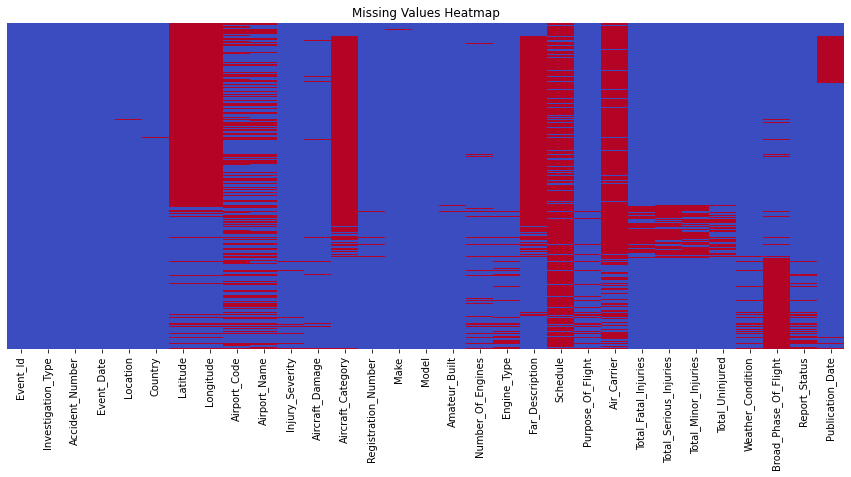

In [19]:
# Visualize missing values
plt.figure(figsize=(15, 6))
sns.heatmap(df_clean.isnull(), 
            cbar=False, 
            cmap='coolwarm',  # or 'YlGnBu', 'magma', etc.
            yticklabels=False)

plt.title("Missing Values Heatmap")
plt.show()

Red represent missing values

In [24]:
# Next we replace our missing values 
for col in df_clean.columns:
    if str(df_clean[col].dtype) == 'object':
        df_clean[col].fillna('Unknown', inplace=True)
    else:
        df_clean[col].fillna(0, inplace=True)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88889 non-null  object 
 5   Country                 88889 non-null  object 
 6   Latitude                88889 non-null  object 
 7   Longitude               88889 non-null  object 
 8   Airport.Code            88889 non-null  object 
 9   Airport.Name            88889 non-null  object 
 10  Injury.Severity         88889 non-null  object 
 11  Aircraft.damage         88889 non-null  object 
 12  Aircraft.Category       88889 non-null  object 
 13  Registration.Number     88889 non-null  object 
 14  Make                    88889 non-null

The above output involved creating a 'for' loop that iterates through our dataset columns and fill the missing values with the set values based on the datatype. Replacing the missing values helps avoid unexpected arrors and completeness of the dataset for analysis.Filling of the missing values in categorical column with placeholder 'Unknown' and numerical column with zero allows me to maintain consistency of dataset without dropping valuable records, hence avoiding bias.

In [25]:
# Convert our date column to datetime
df_clean['Event.Date'] = pd.to_datetime(df_clean['Event.Date'])

# Create a year column on our dataset
df_clean['Year'] = df_clean['Event.Date'].dt.year.astype(int)

# Filter for the 21st century only
df_clean = df_clean[df_clean['Year'] >= 2000]

The above code filters out the possibly discontinued and outdated aircrafts and leaves us with only aircrafts active in the 21st century.

In [26]:
# Identify the unique operational purpose of each flight
df_clean['Purpose.of.flight'].unique()

array(['Positioning', 'Personal', 'Instructional', 'Unknown',
       'Aerial Observation', 'Ferry', 'Public Aircraft', 'Business',
       'Aerial Application', 'Executive/corporate', 'Other Work Use',
       'Flight Test', 'Skydiving', 'Air Race/show', 'Air Drop',
       'Public Aircraft - Federal', 'Glider Tow',
       'Public Aircraft - Local', 'External Load',
       'Public Aircraft - State', 'Banner Tow', 'Firefighting',
       'Air Race show', 'PUBS', 'ASHO', 'PUBL'], dtype=object)

In [27]:
# Create a list that distuinguishes between private and commercial purposes
private = ['Personal', 'Executive/corporate', 'Business', 'Ferry']
commercial = ['Aerial Application', 'Aerial Observation', 'Public Aircraft']

# Create a column that describes operations category
flight_purpose = []

for purpose in df_clean['Purpose.of.flight']:
    if purpose in private:
        flight_purpose.append('Private')
    elif purpose in commercial:
        flight_purpose.append('Commercial')
    else:
        flight_purpose.append('Other')

df_clean['Category of Operation'] = flight_purpose

# Filter our dataset to include only private and commercial used planes
df_clean = df_clean[(df_clean['Category of Operation'] == 'Private') | 
                       (df_clean['Category of Operation'] == 'Commercial')]

# Displays first 5 rows
df_clean.head()


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Year,Category of Operation
47676,20001212X20327,Accident,ATL00FA019,2000-01-01,"MONTEAGLE, TN",United States,Unknown,Unknown,Unknown,Unknown,...,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,19-04-2001,2000,Private
47677,20001212X20383,Accident,LAX00LA063,2000-01-02,"VICTORVILLE, CA",United States,Unknown,Unknown,Unknown,Unknown,...,0.0,0.0,0.0,2.0,VMC,Cruise,Probable Cause,04-12-2000,2000,Private
47679,20001212X20364,Accident,FTW00LA067,2000-01-02,"CORNING, AR",United States,Unknown,Unknown,Unknown,Unknown,...,0.0,0.0,0.0,5.0,VMC,Cruise,Probable Cause,02-03-2001,2000,Private
47680,20001212X20358,Accident,FTW00LA057,2000-01-02,"ODESSA, TX",United States,Unknown,Unknown,Unknown,Unknown,...,0.0,0.0,0.0,2.0,VMC,Climb,Probable Cause,02-03-2001,2000,Private
47681,20001212X20344,Accident,DEN00FA037,2000-01-02,"TELLURIDE, CO",United States,Unknown,Unknown,Unknown,Unknown,...,1.0,0.0,0.0,0.0,IMC,Climb,Probable Cause,19-04-2001,2000,Private


The above code filters out all aircrafts that were not utilized for private and commercial flight use.

In [28]:
# Format the text of categorical columns for consistency
df_clean['Weather.Condition'] = df_clean['Weather.Condition'].str.title() 

# Edit the initials of weather to the full names
df_clean['Weather.Condition'] = df_clean['Weather.Condition'].apply( 
    lambda x: 'Visual Meteorological Conditions' 
    if x == 'Vmc' 
    else 'Instrument Meteorological Conditions' 
    if x == 'Imc' 
    else "Unknown" 
    if x == 'Unk' 
    else x)

# Format the text of categorical columns for consistency
df_clean['Make'] = df_clean['Make'].str.title()
df_clean['Model'] = df_clean['Model'].str.upper()

# Create a new column that combines make and model
df_clean['Make_and_Model'] = df_clean['Make'] + ' ' + df_clean['Model']

The above code edits the texts of the relevant columns to ensure consistency since python is case sensitive.

## 1.6 **Data Evaluation**

### 1.6.1 Objective 1

The first objective is to identify safest aircraft. This involves analyzing the number of accidents based on aircraft 'Make' and 'Model' to determine the aircraft with the lowest risk of accidents.



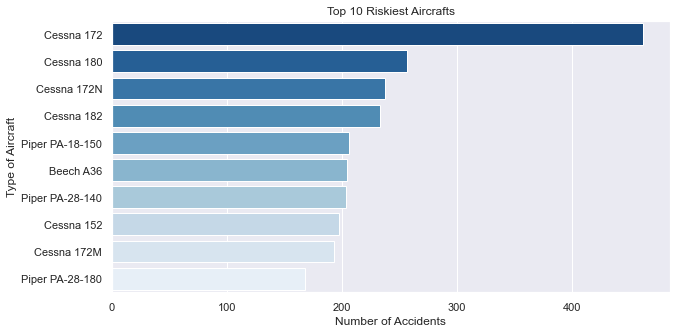

In [29]:
# Identify riskiest aircfrafts based on number of accidents
riskiest_aircraft = df_clean['Make_and_Model'].value_counts().head(10)

# Display visualization
fig, ax = plt.subplots(figsize=(10,5))
sns.set_theme(style='darkgrid')

sns.barplot(y=riskiest_aircraft.index, 
            x=riskiest_aircraft.values, 
            palette='Blues_r')
ax.set(title='Top 10 Riskiest Aircrafts', 
       xlabel='Number of Accidents', 
       ylabel='Type of Aircraft')

#save the visualization and ensure full image displayed
plt.savefig('Images/Risky-aircrafts.jpg', dpi=300, bbox_inches='tight')

The plot shows the the top 10 riskiest aircrafts based on the most accidents between 2000 and 2023. 

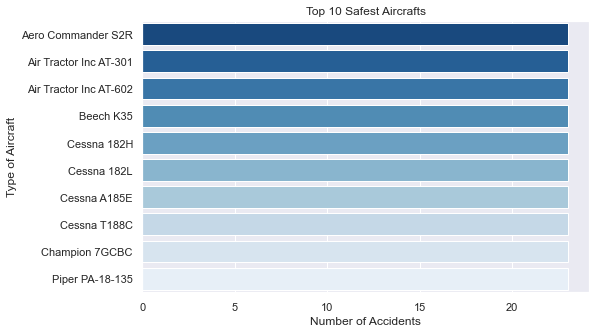

In [31]:
# Identify safest aircrafts based on the lowest number of accidents

# For accuracy lets assume each aircraft has atleast 1 accident per year
safest_aircraft = (df_clean.groupby('Make_and_Model')
                   .size()  # Count number of accidents
                   .loc[lambda x: x >= 23]# Filter for counts greater than 22
                   .nsmallest(10) # Outputs the bottom 10
                   .sort_values(ascending=True) # sorts counts from least to most
                   )

# Visualize the safest aicrafts
fig, ax = plt.subplots(figsize=(8,5))
sns.set_theme(style='darkgrid')

sns.barplot(y=safest_aircraft.index, 
            x=safest_aircraft.values, 
            palette='Blues_r')
ax.set(title='Top 10 Safest Aircrafts', 
       xlabel='Number of Accidents', 
       ylabel= 'Type of Aircraft', 
       )

#save the image and ensure full image displayed
fig.savefig('Images/Safest-aircrafts.jpg', dpi=300, bbox_inches='tight')

The above output shows the safest aircraft based on the number of accidents encountered between 2000 and 2023. It is based on the assumption the most active aircrafts have atleast 1 accident per year for the period, hence on average the least number of accidents should be 23.

### 1.6.2 Objective 2

The second objective involves identifying the risk factors contributing to accidents by analyzing the weather conditions and the broad phase of the aircraft, for example landing or taking off, during the accident.

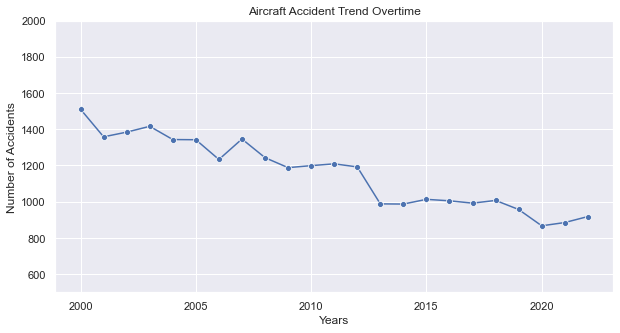

In [32]:
# Number of accidents per aircraft per year
yearly_accidents = df_clean.groupby('Year')['Make_and_Model'].count()
yearly_accidents

# visualize number of accidents over the years for the past 23years
fig, ax = plt.subplots(figsize=(10,5))
sns.set_theme(style='darkgrid')

sns.lineplot(x=yearly_accidents.index, 
             y=yearly_accidents.values, 
             marker='o')
ax.set(title="Aircraft Accident Trend Overtime", 
       xlabel='Years', 
       ylabel='Number of Accidents', 
       ylim=(500,2000)) 

# save the image and ensure image fuly displayed
plt.savefig('Images/Accident-trend.jpg', dpi=300, bbox_inches='tight')

From the above output it can be seen that the overall accidents risk associated with the aircrafts is at a steady decline over the years.

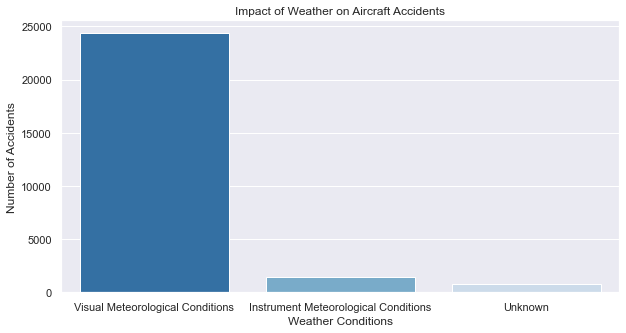

In [34]:
# Weather as risk factor in aircraft accidents
weather_risk = df_clean['Weather.Condition'].value_counts()

# Visualize weather as a risk factor
fig, ax = plt.subplots(figsize=(10,5))
sns.set_theme(style='darkgrid')

sns.barplot(y=weather_risk.values, 
            x=weather_risk.index, 
            palette='Blues_r')
ax.set(title='Impact of Weather on Aircraft Accidents', 
       ylabel= 'Number of Accidents', 
       xlabel = 'Weather Conditions')

#save the image and ensure image fully dispalyed
plt.savefig('Images/Weather-impact.jpg', dpi=300, bbox_inches='tight')

From above output it can be seen that most accidents happened during Visual Meteorological Conditions, meaning that they happened when the weather conditions allowed the pilots to fly with visual references to the ground and other aircrafts without solely relying on instruments. This rules out weather conditions as primary cause of aircraft accidents.

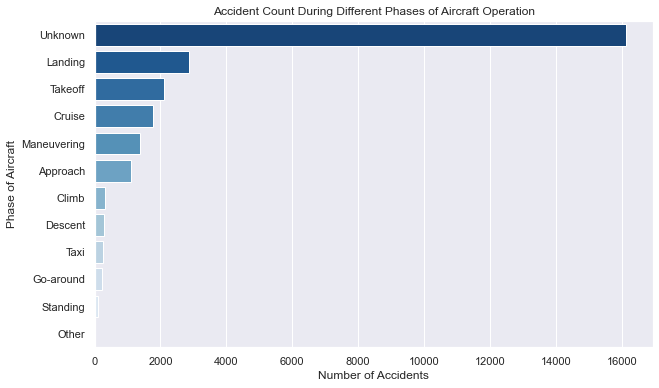

In [35]:
# Identify the phase the aircraft when most accident occur
aircraft_phase = df_clean['Broad.phase.of.flight'].value_counts()

#Visualize every phase by accidents
fig, ax = plt.subplots(figsize=(10,6))
sns.set_theme(style='darkgrid')

sns.barplot(y=aircraft_phase.index, 
            x=aircraft_phase.values, 
            palette='Blues_r')
ax.set(title='Accident Count During Different Phases of Aircraft Operation', 
       ylabel= 'Phase of Aircraft', 
       xlabel = 'Number of Accidents')

#save the image and ensure image fully displayed 
plt.savefig('Images/Flight-phase.jpg', dpi=300, bbox_inches='tight')

From the above output it can be clearly seen that phase of accidents for most of accidents remain clearly unknown. But We can also clearly deduce that a significant number of accidents happened during landing, taking off and during cruising, hence we should view these 3 phases as major risk factors associated with aircraft accidents. 

### 1.6.3 Objective 3

The final objective is to evaluate operational risk factors of the aircraft. This involves analysing the number of accidents as per operations category of aircraft, that is, private and commercial.

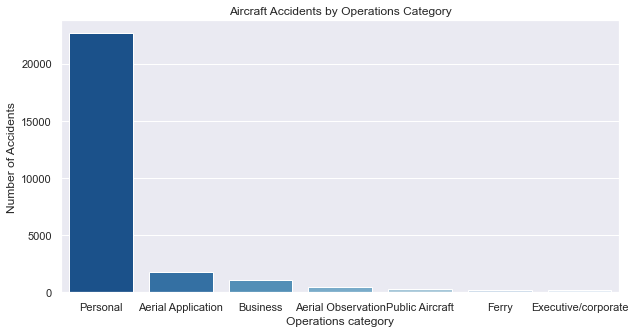

In [36]:
# Evaluate operational risk
operational_category = df_clean['Purpose.of.flight'].value_counts()

# Visualize opeartional risk
fig, ax = plt.subplots(figsize=(10,5))
sns.set_theme(style='darkgrid')

sns.barplot(x=operational_category.index, 
            y=operational_category.values, 
            palette='Blues_r')
ax.set(title='Aircraft Accidents by Operations Category', 
       xlabel='Operations category', 
       ylabel='Number of Accidents')

#save the image and ensure image fully displayed
plt.savefig('Images/Operations-risk.jpg', dpi=300, bbox_inches='tight')

The above output clearly shows that operating private flights is riskier compared to commercial fights due to the number of accidents by private flights.

In [37]:
# Next we save our cleaned data which will be useful during creation Dashboard
df_clean.to_csv('Data/CleanAviationData.csv')

## 1.7 Conclusion

From the analysis of the Aviation Data it be can concluded that:
- The aircrafts with the high number of accidents may be due to high levels of usage
- Adverse weather conditions is a significant risk factor in aircraft accidents but it has not been the primary risk factor in the 21st Century.  
- The phase the aircraft is in when accidents occur remains majorly unknown, but a significant number of accidents often occur during landing, taking off and cruising making them significant risk factors.
- Prioritizing operations of commercial flights is more viable as compared to private flights due to the high number of accidents encountered by private flights.
